# INTRODUCTION

Project Title: Prediction of Phytochemical Bioactivity (IC50) against HMG-CoA Reductase using XGBRegressor

Introduction:
HMG-CoA reductase is a key enzyme involved in the biosynthesis of cholesterol, making it a crucial target for drugs aimed at reducing cholesterol levels. Phytochemicals, naturally occurring compounds found in plants, have shown potential as inhibitors of HMG-CoA reductase. Predicting the bioactivity of these phytochemicals, typically measured by their IC50 values (the concentration required to inhibit the enzyme by 50%), can aid in the discovery of new cholesterol-lowering agents. Machine learning models, such as XGBRegressor, offer powerful tools to predict these bioactivity values based on chemical descriptors.

Aim:
The aim of this project is to develop an XGBRegressor model to predict the IC50 values of phytochemicals against HMG-CoA reductase, thereby assessing their potential as cholesterol-lowering agents.

Objective:
To preprocess the dataset containing phytochemical descriptors and IC50 values.
To build and train an XGBRegressor model using Python to predict IC50 values.
To evaluate the model's performance using metrics such as mean squared error (MSE), R-squared (R²), and mean absolute error (MAE).


In [1]:
# Importing the libraries
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from chembl_webresource_client.new_client import new_client
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score
from rdkit.Chem import Descriptors
import pickle


In [2]:
df = pd.read_csv('combined_rattus.csv') 
df

,canonical_smiles,standard_value,pIC50
0,CC(C)C(\C=C\[C@@H](O)C[C@@H](O)CC([O-])=O)=C(c...,230.0,6.64
1,Cc1cc(C)c(OCC2C[C@@H](O)CC(=O)O2)c(c1)C(Cl)C1C...,1000.0,6.00
2,Cc1cc(-c2ccc(F)cc2)c(/C=C\[C@@H]2C[C@@H](O)CC(...,1000.0,6.00
3,Cc1cc(-c2ccc(F)cc2)c(\C=C\[C@@H]2C[C@@H](O)CC(...,260.0,6.59
4,CC(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)[C@H](CC...,269.0,6.57
...,...,...,...
1345,O[C@@H]1C[C@H](OC(=O)C1)\C=C\c1cnc2c(F)c(F)c(F...,7930.0,5.10
1346,O=C1C[C@H](O)CC(CCc2ccccc2-c2ccccc2)O1,44000.0,4.36
1347,CC(C)c1c(nn(c1OC[C@@H](O)C[C@@H](O)CC(O)=O)-c1...,14.0,7.85
1348,CC(C)c1ccc(Sc2cc3ncc(/C=C/[C@@H]4C[C@@H](O)CC(...,10600.0,4.97


In [195]:
df.isna().sum()

canonical_smiles    0
standard_value      0
pIC50               0
dtype: int64

In [72]:
from buntu import Fizzy

df = Fizzy.bioloactivity('combined_rattus.csv')
df

,canonical_smiles,standard_value,pIC50,Bioactivity
0,CC(C)C(\C=C\[C@@H](O)C[C@@H](O)CC([O-])=O)=C(c...,230.00,6.64,active
1,Cc1cc(C)c(OCC2C[C@@H](O)CC(=O)O2)c(c1)C(Cl)C1C...,1000.00,6.00,active
2,Cc1cc(-c2ccc(F)cc2)c(/C=C\[C@@H]2C[C@@H](O)CC(...,1000.00,6.00,active
3,Cc1cc(-c2ccc(F)cc2)c(\C=C\[C@@H]2C[C@@H](O)CC(...,260.00,6.59,active
4,CC(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)[C@H](CC...,269.00,6.57,active
...,...,...,...,...
1345,O[C@@H]1C[C@H](OC(=O)C1)\C=C\c1cnc2c(F)c(F)c(F...,7930.00,5.10,intermediate
1346,O=C1C[C@H](O)CC(CCc2ccccc2-c2ccccc2)O1,44000.00,4.36,inactive
1347,CC(C)c1c(nn(c1OC[C@@H](O)C[C@@H](O)CC(O)=O)-c1...,14.00,7.85,active
1348,CC(C)c1ccc(Sc2cc3ncc(/C=C/[C@@H]4C[C@@H](O)CC(...,10600.00,4.97,inactive


In [3]:
df.columns.isna().sum()

0

In [3]:
df.Bioactivity.value_counts()

Bioactivity
active          1017
inactive         171
intermediate     162
Name: count, dtype: int64

## INACTIVE

In [53]:
inactive = df[df.Bioactivity == 'inactive'].reset_index(drop=True)
inactive

,canonical_smiles,standard_value,pIC50,Bioactivity
0,O[C@@H]1C[C@H](OC(=O)C1)\C=C\c1ccc(Cl)c(Cl)c1,35000.0,4.46,inactive
1,CC(C)c1ccc(Sc2cc3ncc(\C=C\[C@@H]4C[C@@H](O)CC(...,14200.0,4.85,inactive
2,O[C@@H]1C[C@H](OC(=O)C1)\C=C\c1cnc2cc(Sc3ccc(F...,38900.0,4.41,inactive
3,CC(C)n1nnc(C(/C=C/[C@@H](O)C[C@@H](O)CC(=O)[O-...,300000.0,3.52,inactive
4,CCCCCCCCCCCCCCCC(O)(CC(O)=O)CC(O)=O,50000.0,4.30,inactive
...,...,...,...,...
166,CCCCCCCCCCCCCCCCC(O)(CC(=O)O)CC(=O)O,100000.0,4.00,inactive
167,Cc1ccc(-c2ccc(cc2)-c2ccccc2)n1CC[C@@H]1C[C@@H]...,23000.0,4.64,inactive
168,COc1ccc(cc1)-c1ccc(C)n1CC[C@@H]1C[C@@H](O)CC(=...,12000.0,4.92,inactive
169,O=C1C[C@H](O)CC(CCc2ccccc2-c2ccccc2)O1,44000.0,4.36,inactive


In [3]:
inactive.pIC50.describe()

count    171.000000
mean       4.375497
std        0.512331
min        3.000000
25%        4.000000
50%        4.520000
75%        4.810000
max        5.000000
Name: pIC50, dtype: float64

## ACTIVE

In [5]:
active = df[df.Bioactivity == 'active'].reset_index(drop=True)
active

,canonical_smiles,standard_value,pIC50,Bioactivity
0,CC(C)C(\C=C\[C@@H](O)C[C@@H](O)CC([O-])=O)=C(c...,230.0,6.64,active
1,Cc1cc(C)c(OCC2C[C@@H](O)CC(=O)O2)c(c1)C(Cl)C1C...,1000.0,6.00,active
2,Cc1cc(-c2ccc(F)cc2)c(/C=C\[C@@H]2C[C@@H](O)CC(...,1000.0,6.00,active
3,Cc1cc(-c2ccc(F)cc2)c(\C=C\[C@@H]2C[C@@H](O)CC(...,260.0,6.59,active
4,CC(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)[C@H](CC...,269.0,6.57,active
...,...,...,...,...
1012,CC(C)c1c(S(=O)(=O)N2CCCC2)c(-c2ccccc2)c(-c2ccc...,2.6,8.59,active
1013,Cc1cc(C)c(\C=C\[C@@H]2C[C@@H](O)CC(=O)O2)c(c1)...,8.0,8.10,active
1014,C/C=C\[C@@H]1C[C@H](OC(=O)C(C)(C)CCC)[C@@H]2[C...,15.0,7.82,active
1015,CC(C)c1c(nn(c1OC[C@@H](O)C[C@@H](O)CC(O)=O)-c1...,14.0,7.85,active


In [6]:
active.pIC50.describe()

count    1017.000000
mean        7.589351
std         0.851558
min         6.000000
25%         6.930000
50%         7.660000
75%         8.300000
max         9.970000
Name: pIC50, dtype: float64

## INTERMEDIATE

In [11]:
inter = df[df.Bioactivity == 'intermediate'].reset_index(drop=True)
inter

,canonical_smiles,standard_value,pIC50,Bioactivity
0,O[C@@H]1C[C@@H](CCn2c(ccc2-c2ccc(F)cc2)C2CC2)O...,2000.0,5.70,intermediate
1,COc1ccc2ccccc2c1-c1ccc(C(C)C)n1CC[C@@H]1C[C@@H...,9600.0,5.02,intermediate
2,COc1ccccc1-c1ccc(C(C)C)n1CC[C@@H]1C[C@@H](O)CC...,2200.0,5.66,intermediate
3,O=C1C[C@H](O)C[C@@H](/C=C/c2c(Cl)cc(Cl)cc2OCCC...,1450.0,5.84,intermediate
4,O[C@@H]1C[C@H](OC(=O)C1)\C=C\c1c(Cl)cccc1Cl,7900.0,5.10,intermediate
...,...,...,...,...
157,O[C@@H]1C[C@H](OC(=O)C1)\C=C\c1ccccc1-c1ccccc1,3000.0,5.52,intermediate
158,Cc1ccc(COc2cc(Cl)cc(Cl)c2\C=C\[C@@H]2C[C@@H](O...,4900.0,5.31,intermediate
159,O[C@@H]1C[C@H](OC(=O)C1)\C=C\c1cccc2cccc(Br)c12,4120.0,5.39,intermediate
160,CCOC(=O)c1c(C)n(CC[C@@H]2C[C@@H](O)CC(=O)O2)c(...,4000.0,5.40,intermediate


In [7]:
inter.pIC50.describe()

count    162.000000
mean       5.526358
std        0.266187
min        5.020000
25%        5.360000
50%        5.530000
75%        5.740000
max        5.960000
Name: pIC50, dtype: float64

<Axes: xlabel='Bioactivity', ylabel='pIC50'>

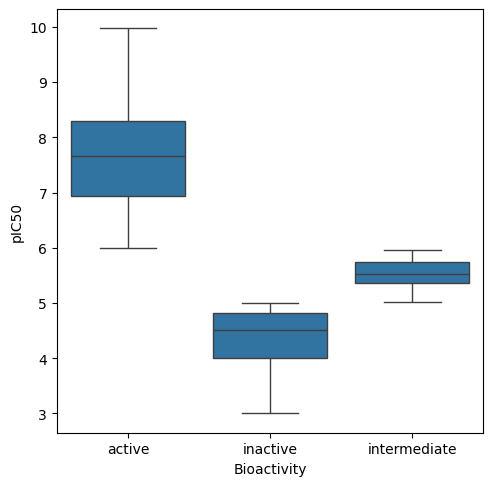

In [73]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x ='Bioactivity',y= 'pIC50', data=df)     

In [54]:
df.Bioactivity.value_counts()

Bioactivity
active          1017
inactive         171
intermediate     162
Name: count, dtype: int64

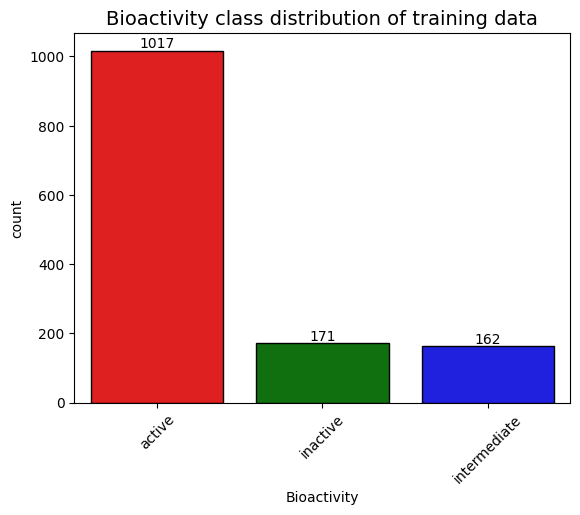

In [74]:
# plt.figure(figsize=(5, 10))
color = ['red', 'green','blue']
sns.countplot(x='Bioactivity', data=df, edgecolor='black',palette= color  )
plt.title('Bioactivity class distribution of training data', fontsize=14)
plt.xticks(rotation=45)
for i in range(3):
    plt.text(i, df.Bioactivity.value_counts()[i], df.Bioactivity.value_counts()[i], ha='center', va='bottom')

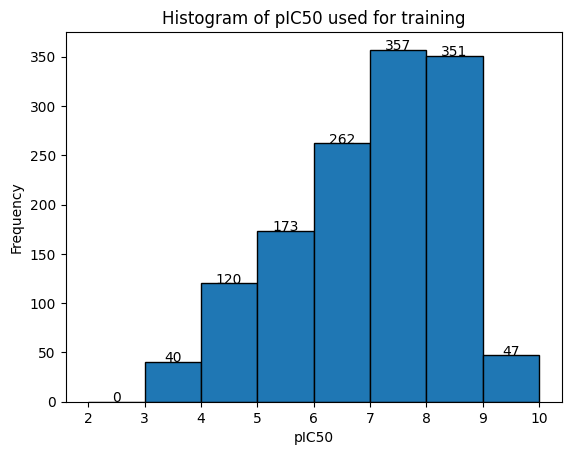

In [13]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(5, 10))
bin = [2, 3, 4, 5, 6, 7, 8, 9, 10]


n, bins, _ = plt.hist(df['pIC50'], bins=bin, edgecolor='black')


plt.xlabel('pIC50')
plt.ylabel('Frequency')
plt.title('Histogram of pIC50 used for training')


for i in range(len(bins) - 1):
    plt.text((bins[i] + bins[i + 1]) / 2, n[i], 
             str(int(n[i])), ha='center')


plt.show()


In [8]:
df

,canonical_smiles,standard_value,pIC50,Bioactivity
0,CC(C)C(\C=C\[C@@H](O)C[C@@H](O)CC([O-])=O)=C(c...,230.0,6.64,active
1,Cc1cc(C)c(OCC2C[C@@H](O)CC(=O)O2)c(c1)C(Cl)C1C...,1000.0,6.00,active
2,Cc1cc(-c2ccc(F)cc2)c(/C=C\[C@@H]2C[C@@H](O)CC(...,1000.0,6.00,active
3,Cc1cc(-c2ccc(F)cc2)c(\C=C\[C@@H]2C[C@@H](O)CC(...,260.0,6.59,active
4,CC(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)[C@H](CC...,269.0,6.57,active
...,...,...,...,...
1345,O[C@@H]1C[C@H](OC(=O)C1)\C=C\c1cnc2c(F)c(F)c(F...,7930.0,5.10,intermediate
1346,O=C1C[C@H](O)CC(CCc2ccccc2-c2ccccc2)O1,44000.0,4.36,inactive
1347,CC(C)c1c(nn(c1OC[C@@H](O)C[C@@H](O)CC(O)=O)-c1...,14.0,7.85,active
1348,CC(C)c1ccc(Sc2cc3ncc(/C=C/[C@@H]4C[C@@H](O)CC(...,10600.0,4.97,inactive


In [45]:
df.dtypes

canonical_smiles     object
standard_value      float64
pIC50               float64
Bioactivity          object
dtype: object

GETTING THE DESCRIPTORS

In [6]:
smiles = df['canonical_smiles'].to_list()
embedding = []
for smile in smiles:    
    molecule = Chem.MolFromSmiles(smile)
    fingerprint = AllChem.GetMorganFingerprintAsBitVect(molecule, radius=2, nBits=2048)
    fingerprint_array = np.array(fingerprint)    
    embedding.append(fingerprint_array)
df1 = pd.DataFrame(embedding)
df2 = df.pIC50
df = pd.concat([df2, df1], axis=1)
df

,pIC50,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,6.64,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,6.00,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6.59,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.57,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,5.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1346,4.36,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1347,7.85,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1348,4.97,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


DEFINING X AND Y

In [7]:
x = df.drop('pIC50', axis=1)
y = df.pIC50

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
display(x,y,x_train, x_test, y_train, y_test)

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1346,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1347,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1348,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0       6.64
1       6.00
2       6.00
3       6.59
4       6.57
        ... 
1345    5.10
1346    4.36
1347    7.85
1348    4.97
1349    6.40
Name: pIC50, Length: 1350, dtype: float64

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
755,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1040,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1342,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1130,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1294,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
860,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
289,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1036,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
346,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1075,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
722,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
54,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


755     8.66
109     4.92
1040    8.10
548     7.03
1342    5.40
        ... 
1095    8.52
1130    8.15
1294    8.31
860     7.52
1126    8.41
Name: pIC50, Length: 1080, dtype: float64

289     6.82
1036    5.28
535     8.30
346     8.33
1075    7.85
        ... 
1280    6.60
435     7.15
722     5.43
54      5.66
382     4.63
Name: pIC50, Length: 270, dtype: float64

In [ ]:
display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

: 

## LAZY PREDICT

In [60]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [61]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

In [62]:
models, predictions = reg.fit(x_train, x_test, y_train, y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

 55%|█████▍    | 23/42 [12:27<13:29, 42.62s/it] 

LassoLarsIC model failed to execute
You are using LassoLarsIC in the case where the number of samples is smaller than the number of features. In this setting, getting a good estimate for the variance of the noise is not possible. Provide an estimate of the noise variance in the constructor.


 76%|███████▌  | 32/42 [12:50<00:28,  2.88s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.
RANSACRegressor model failed to execute
`min_samples` may not be larger than number of samples: n_samples = 1080.


 98%|█████████▊| 41/42 [13:08<00:01,  1.39s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1206
[LightGBM] [Info] Number of data points in the train set: 1080, number of used features: 402
[LightGBM] [Info] Start training from score 6.937019


100%|██████████| 42/42 [13:08<00:00, 18.78s/it]


In [2]:
from scipy import stats

# Sample data
group1 = [23, 20, 22, 30]
group2 = [25, 27, 21, 28]
group3 = [20, 22, 23, 21]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


F-statistic: 1.4171270718232045
P-value: 0.291714005227465


In [3]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

# Combine all groups into a single array
data = np.array(group1 + group2 + group3)
groups = ['group1'] * len(group1) + ['group2'] * len(group2) + ['group3'] * len(group3)

# Perform Tukey HSD post-hoc test
tukey_result = pairwise_tukeyhsd(endog=data, groups=groups, alpha=0.05)

print(tukey_result)


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
group1 group2      1.5 0.7867  -4.7604 7.7604  False
group1 group3    -2.25 0.5931  -8.5104 4.0104  False
group2 group3    -3.75 0.2671 -10.0104 2.5104  False
----------------------------------------------------


In [5]:
from scipy import stats
import numpy as np

# Sample data
group1 = [23, 20, 30]
group2 = [25, 27, 21, 28]
group3 = [20, 22, 23, 21]

# Calculate means of each group
mean_group1 = np.mean(group1)
mean_group2 = np.mean(group2)
mean_group3 = np.mean(group3)

# Calculate the grand mean
grand_mean = np.mean(group1 + group2 + group3)

# Print the means
print(f"Mean of Group 1: {mean_group1}")
print(f"Mean of Group 2: {mean_group2}")
print(f"Mean of Group 3: {mean_group3}")
print(f"Grand Mean: {grand_mean}")

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

# Print the F-statistic and p-value
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


Mean of Group 1: 24.333333333333332
Mean of Group 2: 25.25
Mean of Group 3: 21.5
Grand Mean: 23.636363636363637
F-statistic: 1.3945822740422542
P-value: 0.30227949031607004


Mean of Group 1: 23.75
Mean of Group 2: 25.25
Mean of Group 3: 21.5
Grand Mean: 23.5
F-statistic: 1.4171270718232045
P-value: 0.291714005227465

In [66]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,1.01,0.90,0.44,1.28
BaggingRegressor,1.01,0.90,0.44,1.43
RandomForestRegressor,1.02,0.90,0.45,10.37
ElasticNetCV,1.02,0.90,0.45,255.72
PoissonRegressor,1.02,0.89,0.46,0.46
LassoCV,1.02,0.89,0.47,283.16
BayesianRidge,1.02,0.88,0.48,3.63
RidgeCV,1.02,0.87,0.50,0.65
TweedieRegressor,1.02,0.86,0.53,0.29


In [65]:
models.sort_values(by='R-Squared', ascending=False, inplace=True)
models
# models.to_csv('models.csv')

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,1.01,0.90,0.44,1.28
BaggingRegressor,1.01,0.90,0.44,1.43
RandomForestRegressor,1.02,0.90,0.45,10.37
ElasticNetCV,1.02,0.90,0.45,255.72
PoissonRegressor,1.02,0.89,0.46,0.46
LassoCV,1.02,0.89,0.47,283.16
BayesianRidge,1.02,0.88,0.48,3.63
RidgeCV,1.02,0.87,0.50,0.65
TweedieRegressor,1.02,0.86,0.53,0.29


In [67]:
pd.read_csv('models1.csv')

,Model,Adjusted R-Squared,R-Squared,RMSE,Time Taken
0,XGBRegressor,1.01,0.90,0.44,2.50
1,BaggingRegressor,1.01,0.90,0.44,1.05
2,RandomForestRegressor,1.02,0.90,0.45,6.98
3,ElasticNetCV,1.02,0.90,0.45,275.28
4,PoissonRegressor,1.02,0.89,0.46,0.40
5,LassoCV,1.02,0.89,0.47,252.43
6,BayesianRidge,1.02,0.88,0.48,4.33
7,RidgeCV,1.02,0.87,0.50,0.67
8,TweedieRegressor,1.02,0.86,0.53,0.30
9,GammaRegressor,1.02,0.86,0.53,0.34


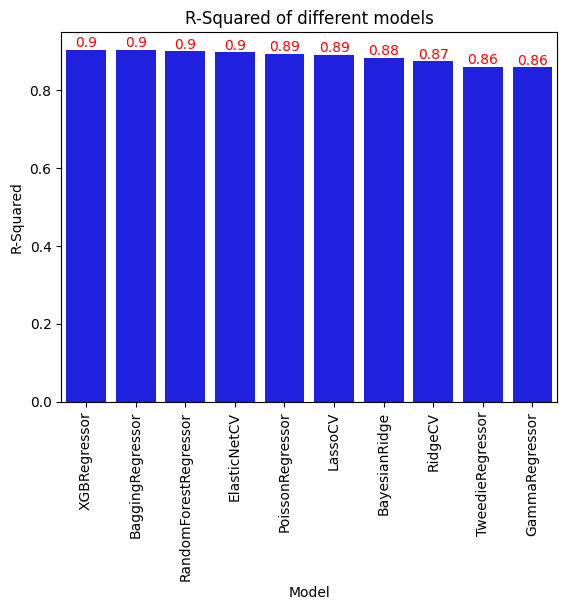

In [68]:
# models = [ 'XGBRegressor','BaggingRegressor', 'RandomForestRegressor','ElasticNetCV','PoissonRegressor','LassoCV','BayesianRidge','RidgeCV',	]
# pearson_corr = [0.90,0.90, 0.90, 0.90, 0.89, 0.89,]

models = models.head(10)
    ax = sns.barplot(x='Model', y= 'R-Squared', data=models, color='blue')
    plt.xticks(rotation=90)
    plt.xlabel('Model')
    plt.ylabel('R-Squared')
    plt.title('R-Squared of different models')

    for i in range(len(models)):
        ax.text(i, models['R-Squared'][i], round(models['R-Squared'][i], 2), ha='center', va='bottom', color = 'red')




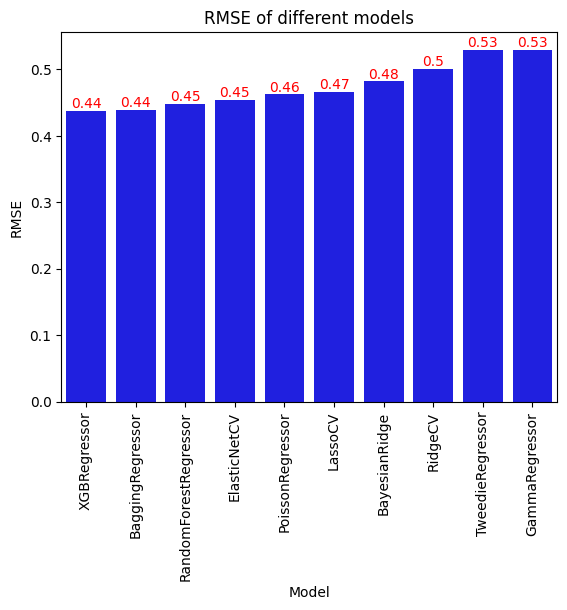

In [69]:
models = models.head(10)
ax = sns.barplot(x='Model', y= 'RMSE', data=models, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of different models')

for i in range(len(models)):
    ax.text(i, models['RMSE'][i], round(models['RMSE'][i], 2), ha='center', va='bottom', color = 'red')

## XGBRegressor

In [9]:
model = XGBRegressor(n_estimators=100, random_state=42)
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')
print("R-squared scores for each fold:", cv_results)
print("Mean R-squared score:", sum(cv_results)/num_folds)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score on the testing set:", r2)

y_pred = np.array(y_pred).flatten()  
y_test = np.array(y_test).flatten() 
pearson_corr, _ = pearsonr(y_pred, y_test)
print(f"Pearson Correlation Coefficient: {pearson_corr}")


R-squared scores for each fold: [0.76945188 0.72588291 0.7991535  0.7528403  0.82831186 0.86889599
 0.93849077 0.87325737 0.86758229 0.8626376 ]
Mean R-squared score: 0.8286504476524487
R-squared score on the testing set: 0.9029919753388451
Pearson Correlation Coefficient: 0.9505975500474466


[0.769451879586807, 0.7258829094837767, 0.7991535010871958, 0.7528403009065454, 0.8283118644727774, 0.868895993592453, 0.9384907730622863, 0.8732573676270682, 0.8675822879951642, 0.8626375987104129]
[0.77, 0.73, 0.8, 0.75, 0.83, 0.87, 0.94, 0.87, 0.87, 0.86]


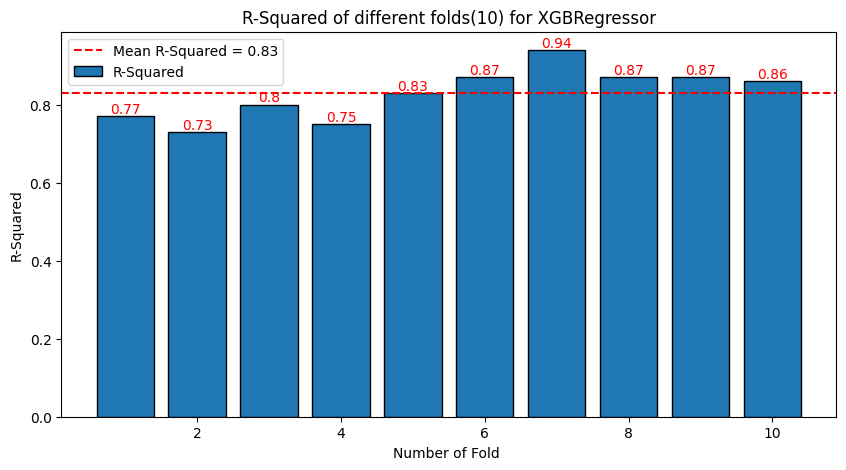

In [12]:
cv_results1 = list(cv_results)
print(cv_results1)
cv_results1 = [round(i,2) for i in cv_results1]
print(cv_results1)

y = [1,2,3,4,5,6,7,8,9,10]



plt.figure(figsize=(10, 5))
plt.bar(y,cv_results1, edgecolor='black')
plt.xlabel('Number of Fold ')
plt.ylabel('R-Squared')
plt.axhline(y=0.83, color='r', linestyle='--')
plt.title('R-Squared of different folds(10) for XGBRegressor')
plt.legend(['Mean R-Squared = 0.83', 'R-Squared'],)

for i in range(len(cv_results1)):
    plt.annotate(cv_results1[i], xy=(y[i], cv_results1[i]), ha='center', va='bottom',color = 'red')

## BaggingRegressor

In [13]:
model = BaggingRegressor()
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')
print("R-squared scores for each fold:", cv_results)
print("Mean R-squared score:", sum(cv_results)/num_folds)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score on the testing set:", r2)

y_pred = np.array(y_pred).flatten()  
y_test = np.array(y_test).flatten() 
pearson_corr, _ = pearsonr(y_pred, y_test)
print(f"Pearson Correlation Coefficient: {pearson_corr}")


R-squared scores for each fold: [0.66798934 0.74257121 0.81643376 0.69610202 0.77928865 0.8281351
 0.90502811 0.83052347 0.88098905 0.78094838]
Mean R-squared score: 0.7928009084457157
R-squared score on the testing set: 0.8815224996436898
Pearson Correlation Coefficient: 0.9395737288811394


[0.6679893403612724, 0.7425712090100021, 0.8164337579962828, 0.6961020206054739, 0.7792886538848346, 0.8281350988858098, 0.9050281122971285, 0.8305234657738967, 0.8809890506175745, 0.7809483750248821]
[0.67, 0.74, 0.82, 0.7, 0.78, 0.83, 0.91, 0.83, 0.88, 0.78]


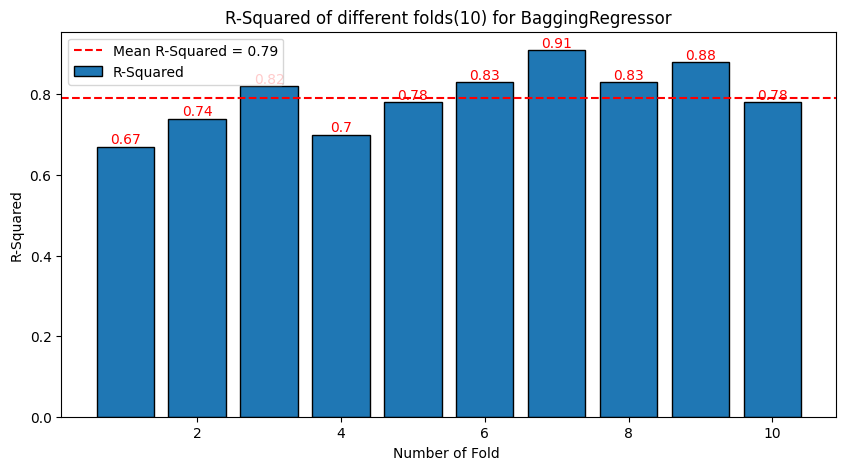

In [15]:
cv_results1 = list(cv_results)
print(cv_results1)
cv_results1 = [round(i,2) for i in cv_results1]
print(cv_results1)

y = [1,2,3,4,5,6,7,8,9,10]



plt.figure(figsize=(10, 5))
plt.bar(y,cv_results1, edgecolor='black')
plt.xlabel('Number of Fold ')
plt.ylabel('R-Squared')
plt.axhline(y=0.79, color='r', linestyle='--')
plt.title('R-Squared of different folds(10) for BaggingRegressor')
plt.legend(['Mean R-Squared = 0.79', 'R-Squared'],)

for i in range(len(cv_results1)):
    plt.annotate(cv_results1[i], xy=(y[i], cv_results1[i]), ha='center', va='bottom',color = 'red')

## RandomForestRegressor

In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Example dataset
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])

# Initialize StratifiedKFold with desired number of folds (e.g., 5)
k = 5
stratified_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Iterate over the splits
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Here, you can train your model on X_train and y_train,
    # and then evaluate it on X_test and y_test.


In [16]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')
print("R-squared scores for each fold:", cv_results)
print("Mean R-squared score:", sum(cv_results)/num_folds)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score on the testing set:", r2)

y_pred = np.array(y_pred).flatten()  
y_test = np.array(y_test).flatten() 
pearson_corr, _ = pearsonr(y_pred, y_test)
print(f"Pearson Correlation Coefficient: {pearson_corr}")


R-squared scores for each fold: [0.72654736 0.74721655 0.82809906 0.72325711 0.78307257 0.85236082
 0.91682194 0.82640586 0.90116262 0.81594902]
Mean R-squared score: 0.8120892910677325
R-squared score on the testing set: 0.8982593853576819
Pearson Correlation Coefficient: 0.9482662596819396


[0.7265473634780797, 0.7472165499565163, 0.8280990551018128, 0.7232571071004377, 0.7830725708529471, 0.85236081763357, 0.9168219438764641, 0.8264058628529599, 0.9011626156226515, 0.8159490242018859]
[0.73, 0.75, 0.83, 0.72, 0.78, 0.85, 0.92, 0.83, 0.9, 0.82]


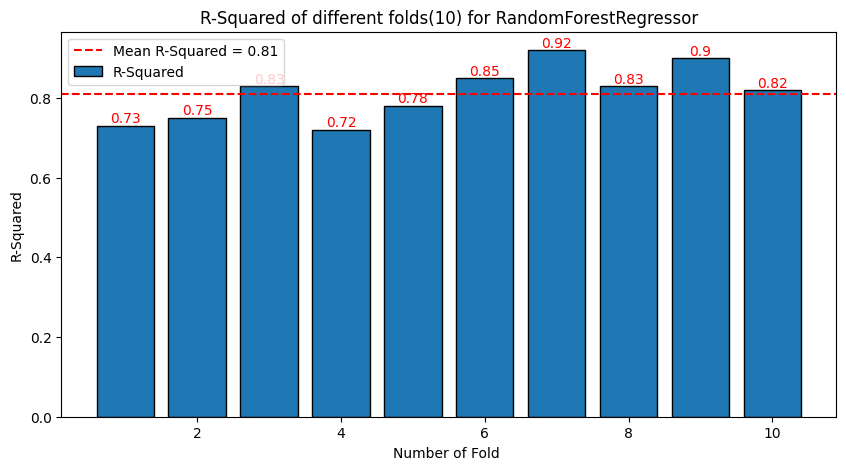

In [17]:
cv_results1 = list(cv_results)
print(cv_results1)
cv_results1 = [round(i,2) for i in cv_results1]
print(cv_results1)

y = [1,2,3,4,5,6,7,8,9,10]



plt.figure(figsize=(10, 5))
plt.bar(y,cv_results1, edgecolor='black')
plt.xlabel('Number of Fold ')
plt.ylabel('R-Squared')
plt.axhline(y=0.81, color='r', linestyle='--')
plt.title('R-Squared of different folds(10) for RandomForestRegressor')
plt.legend(['Mean R-Squared = 0.81', 'R-Squared'],)

for i in range(len(cv_results1)):
    plt.annotate(cv_results1[i], xy=(y[i], cv_results1[i]), ha='center', va='bottom',color = 'red')

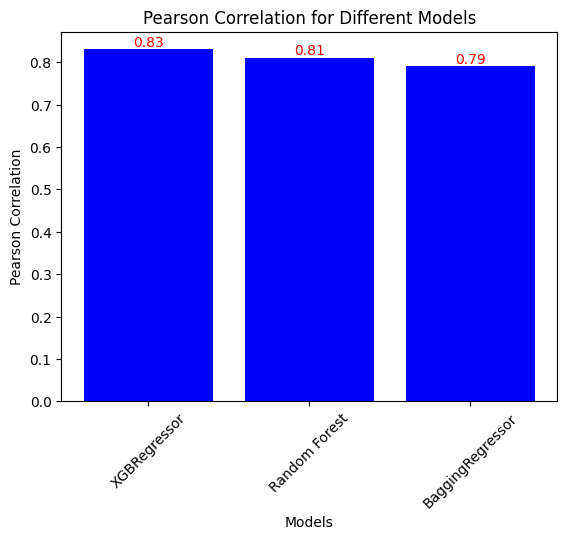

In [99]:
models1 = [ 'XGBRegressor','Random Forest',  'BaggingRegressor']
mean_score = [0.83,0.81, 0.79]
plt.bar(models1, mean_score, color='blue')
plt.xlabel('Models')
plt.ylabel('Pearson Correlation')
plt.title('Pearson Correlation for Different Models')
plt.xticks(rotation=45)

for i in range(len(mean_score)):
    plt.annotate(mean_score[i], xy=(i, mean_score[i]), ha='center', va='bottom',color = 'red')

plt.show()

In [98]:
from sklearn.linear_model import LassoCV, PoissonRegressor, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from xgboost import XGBRegressor


# def model_selection(x_train, x_test, y_train, y_test):
#     all = {}
#     models = [LassoCV(), PoissonRegressor(), ElasticNetCV(), RandomForestRegressor(), BaggingRegressor()]
#     for model in models:
#         model.fit(x_train, y_train)
#         y_pred = model.predict(x_test)
#         r2 = r2_score(y_test, y_pred)
#         all[model] = r2
#         print(f'{model} has an r2 score of {r2}')
#     return all

lists = [LassoCV(), PoissonRegressor(), ElasticNetCV(), RandomForestRegressor(), BaggingRegressor(), XGBRegressor()]
name = []
scores = []
for x in lists:
    model = x.fit(x_train, y_train)
    pred = model.predict(x_test)
    score = r2_score(y_test, pred)
    print(f'{x} has an r2 score of {score}')
    name.append(x)
    scores.append(score)    
    

table = pd.DataFrame({'Model Names':name, 'Accuracy':scores})



        

LassoCV() has an r2 score of 0.8808407028337
PoissonRegressor() has an r2 score of 0.7254587111606288
ElasticNetCV() has an r2 score of 0.8769396702484537
RandomForestRegressor() has an r2 score of 0.8986600685450181
BaggingRegressor() has an r2 score of 0.884584585798873
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, rand

In [100]:
table.sort_values(by='Accuracy', ascending=False)

,Model Names,Accuracy
5,"XGBRegressor(base_score=None, booster=None, ca...",0.90
3,"(DecisionTreeRegressor(max_features=1.0, rando...",0.90
4,(DecisionTreeRegressor(random_state=1705755226...,0.88
0,LassoCV(),0.88
2,ElasticNetCV(),0.88
1,PoissonRegressor(),0.73


## RANDOM FOREST

In [3]:
from sklearn.linear_model import LassoCV, PoissonRegressor, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error




In [51]:
from scipy.stats import pearsonr
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f'The r2 score of the model is {r2}')
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'The root mean squared error is {rmse}')
y_pred = np.array(y_pred).flatten()
y_test = np.array(y_test).flatten()
pearson,_ = pearsonr(y_test, y_pred)
print(f'The pearson correlation is {pearson}')



The r2 score of the model is 0.8982593853576819
The root mean squared error is 0.4479948390911377
The pearson correlation is 0.9482662596819396


## XGBRegressor


In [53]:
model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f'The r2 score of the model is {r2}')
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'The root mean squared error is {rmse}')
y_pred = np.array(y_pred).flatten()
y_test = np.array(y_test).flatten()
pearson,_ = pearsonr(y_test, y_pred)
print(f'The pearson correlation is {pearson}')

The r2 score of the model is 0.9029919753388451
The root mean squared error is 0.43745125125910617
The pearson correlation is 0.9505975500474466


## LasoCV

In [55]:
model = LassoCV(max_iter=10000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f'The r2 score of the model is {r2}')
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'The root mean squared error is {rmse}')
y_pred = np.array(y_pred).flatten()
y_test = np.array(y_test).flatten()
pearson,_ = pearsonr(y_test, y_pred)
print(f'The pearson correlation is {pearson}')

The r2 score of the model is 0.8809155879045344
The root mean squared error is 0.4846779819186123
The pearson correlation is 0.9388756477686379


## ElasticNetCV

In [56]:
model = ElasticNetCV(max_iter=10000) 
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f'The r2 score of the model is {r2}')
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'The root mean squared error is {rmse}')
y_pred = np.array(y_pred).flatten()
y_test = np.array(y_test).flatten()
pearson,_ = pearsonr(y_test, y_pred)
print(f'The pearson correlation is {pearson}')

The r2 score of the model is 0.8772073426711726
The root mean squared error is 0.49216647949549763
The pearson correlation is 0.9369654618426726


## BaggingRegressor

In [54]:
model = BaggingRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f'The r2 score of the model is {r2}')
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'The root mean squared error is {rmse}')
y_pred = np.array(y_pred).flatten()
y_test = np.array(y_test).flatten()
pearson,_ = pearsonr(y_test, y_pred)
print(f'The pearson correlation is {pearson}')

The r2 score of the model is 0.8971028893107117
The root mean squared error is 0.45053384593358786
The pearson correlation is 0.9475384262172618


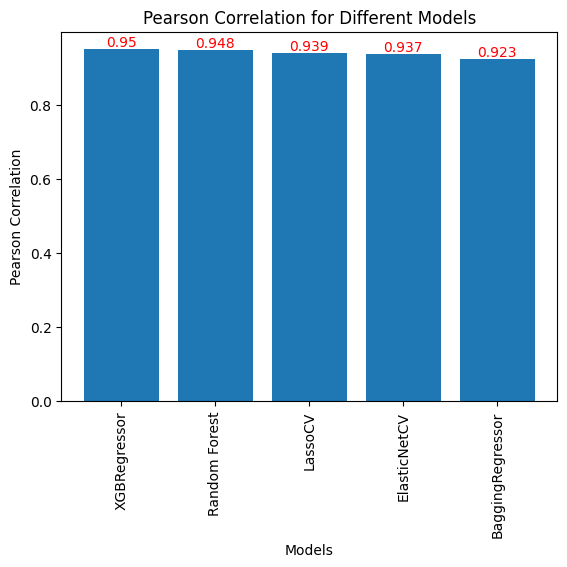

In [41]:
models = [ 'XGBRegressor','Random Forest', 'LassoCV', 'ElasticNetCV', 'BaggingRegressor']
pearson_corr = [0.950,0.948, 0.939, 0.937, 0.923]
plt.bar(models, pearson_corr)
plt.xlabel('Models')
plt.ylabel('Pearson Correlation')
plt.title('Pearson Correlation for Different Models')
plt.xticks(rotation=90)

for i in range(len(pearson_corr)):
    plt.annotate(pearson_corr[i], xy=(i, pearson_corr[i]), ha='center', va='bottom',color = 'red')

plt.show()

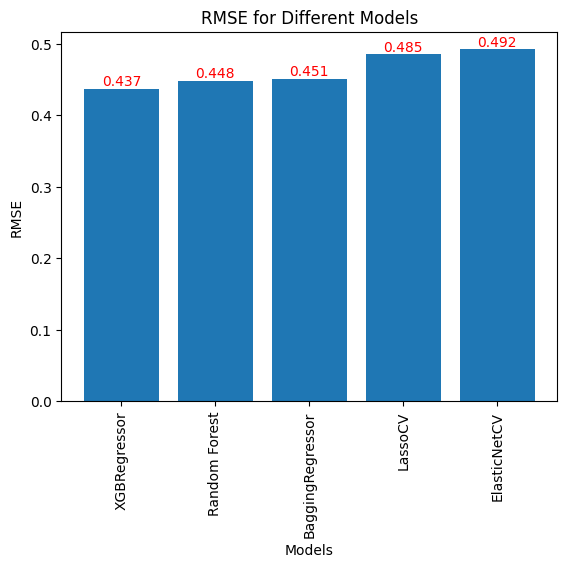

In [58]:
models = [ 'XGBRegressor','Random Forest','BaggingRegressor','LassoCV','ElasticNetCV' ]
pearson_corr = [ 0.437,0.448,0.451,0.485,0.492]
plt.bar(models, pearson_corr)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE for Different Models')
plt.xticks(rotation=90)

for i in range(len(pearson_corr)):
    plt.annotate(pearson_corr[i], xy=(i, pearson_corr[i]), ha='center', va='bottom',color = 'red')

plt.show()

In [59]:
display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1080, 2048)

(270, 2048)

(1080,)

(270,)

## MODEL VALIDATION


In [64]:
model = RandomForestRegressor()
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')
print("R-squared scores for each fold:", cv_results)
print("Mean R-squared score:", sum(cv_results)/num_folds)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score on the testing set:", r2)

y_pred = np.array(y_pred).flatten()  
y_test = np.array(y_test).flatten() 
pearson_corr, _ = pearsonr(y_pred, y_test)
print(f"Pearson Correlation Coefficient: {pearson_corr}")


R-squared scores for each fold: [0.7214568  0.75038719 0.82225866 0.73734073 0.79017287 0.84866415
 0.92198451 0.83774688 0.89020096 0.81753371]
Mean R-squared score: 0.813774646250921
R-squared score on the testing set: 0.9012805509137788
Pearson Correlation Coefficient: 0.9499339745959262


In [105]:
model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score on the testing set:", r2)

R-squared score on the testing set: 0.9029919753388451


Text(0.5, 1.0, 'Experimental vs Predicted pIC50(XGBRegressor)')

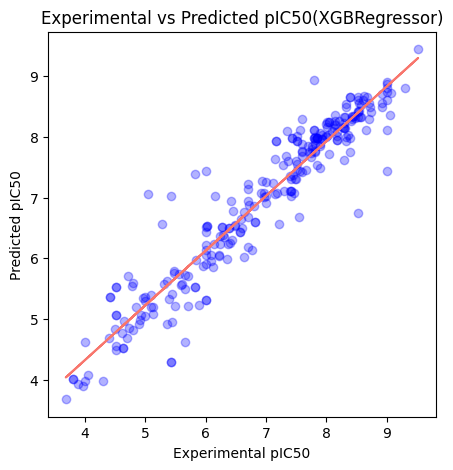

In [106]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=y_pred, c="blue", alpha=0.3)
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)

plt.plot(y_test,p(y_test),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')
plt.title('Experimental vs Predicted pIC50(XGBRegressor)')

In [107]:
pickle.dump(model, open('XGBRegressor_model.pkl', 'wb'))

## MODEL IN ACTION


In [111]:
df_new = pd.read_csv('Pregnane_list.csv')
df_new

,compound_name,Canonical Smile
0,"5alpha-Pregnane-3,20-dione",CC(=O)C1CCC2C1(CCC3C2CCC4C3(CCC(=O)C4)C)C
1,"5beta-Pregnane-3,20-dione",CC(=O)C1CCC2C1(CCC3C2CCC4C3(CCC(=O)C4)C)C
2,"Pregnane-3alpha,17alpha-diol-11,20-dione",CC(=O)C1(CCC2C1(CC(=O)C3C2CCC4C3(CCC(C4)O)C)C)O
3,"Silane, [[(3alpha,5beta,20S)-pregnane-3,20-diy...",CC(C1CCC2C1(CCC3C2CCC4C3(CCC(C4)O[Si](C)(C)C)C...
4,5beta-Pregnane,CCC1CCC2C1(CCC3C2CCC4C3(CCCC4)C)C
...,...,...
1584,Lovastatin,CCC(C)C(=O)OC1CC(C=C2C1C(C(C=C2)C)CCC3CC(CC(=O...
1585,Pitavastatin,C1CC1C2=NC3=CC=CC=C3C(=C2C=CC(CC(CC(=O)O)O)O)C...
1586,Rosuvastatin,CC(C)C1=NC(=NC(=C1C=CC(CC(CC(=O)O)O)O)C2=CC=C(...
1587,Simvastatin,CCC(C)(C)C(=O)OC1CC(C=C2C1C(C(C=C2)C)CCC3CC(CC...


In [9]:
a = pd.read_csv('smiles.csv', header=None)
a.columns = ['name','canonical_smiles']


smiles = a['canonical_smiles'].to_list()
embedding = []
for smile in smiles:
    
    molecule = Chem.MolFromSmiles(smile)
    fingerprint = AllChem.GetMorganFingerprintAsBitVect(molecule, radius=2, nBits=2048)
    fingerprint_array = np.array(fingerprint)    
    embedding.append(fingerprint_array)
df1 = pd.DataFrame(embedding)
df1

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [112]:
smiles = df_new['Canonical Smile'].to_list()
embedding = []
for smile in smiles:    
    molecule = Chem.MolFromSmiles(smile)
    fingerprint = AllChem.GetMorganFingerprintAsBitVect(molecule, radius=2, nBits=2048)
    fingerprint_array = np.array(fingerprint)    
    embedding.append(fingerprint_array)
df1 = pd.DataFrame(embedding)
df1


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1585,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1586,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1587,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [10]:
model = pickle.load(open('XGBRegressor_model.pkl', 'rb'))
y_pred = model.predict(df1)
a['Predicted pIC50'] = y_pred

In [11]:
a

,name,canonical_smiles,Predicted pIC50
0,finasteride,CC12CCC3C(C1CCC2C(=O)NC(C)(C)C)CCC4C3(C=CC(=O...,7.241515
1,dutasteride,CC12CCC3C(C1CCC2C(=O)NC4=C(C=CC(=C4)C(F)(F)F)...,6.695078
2,lycopene,CC(=CCCC(=CC=CC(=CC=CC(=CC=CC=C(C)C=CC=C(C)C=...,4.070555
3,naringenin chalcone,C1=CC(=CC=C1C=CC(=O)C2=C(C=C(C=C2O)O)O)O,4.172308
4,phytoene,CC(=CCCC(=CCCC(=CCCC(=CC=CC=C(C)CCC=C(C)CCC=C...,4.070555
5,rutin,CC1C(C(C(C(O1)OCC2C(C(C(C(O2)OC3=C(OC4=CC(=CC...,5.834856
6,phytofluene,CC(=CCCC(=CCCC(=CCCC(=CC=CC=C(C)C=CC=C(C)CCC=...,4.070555
7,quercetin,C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)...,4.991979
8,beta carotene,CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC=CC=C(C)C=CC...,4.192662
9,chlorogenic acid,C1C(C(C(CC1(C(=O)O)O)OC(=O)C=CC2=CC(=C(C=C2)O...,4.252078


In [7]:
y_pred

array([4.070555, 8.106812], dtype=float32)

In [125]:
df_new.columns = ['compound_name', 'Canonical Smile', 'Predicted pIC50']

In [126]:
df_new["Predicted pIC50"].describe()

count   1589.00
mean       4.65
std        0.69
min        3.07
25%        4.26
50%        4.55
75%        4.90
max        8.56
Name: Predicted pIC50, dtype: float64

In [127]:
df_new.to_csv('Pregnane_predictedlist.csv', index=False)

In [117]:
df3 = df_new[df_new['Predicted pIC50'] >= 6]
df3


,compound_name,Canonical Smile,Predicted pIC50
235,"3alpha-Hydroxy-6-aza-5alpha-pregnane-7,20-dione",CC(=O)C1CCC2C1(CCC3C2C(=O)NC4C3(CCC(C4)O)C)C,7.00
244,Nicotinic acid 17-hydroxy-16alpha-methyl-20-ox...,CC1CC2C3CCC4CC(CCC4(C3CCC2(C1(C(=O)C)O)C)C)OC(...,6.79
298,"[(17S)-12beta,20-Di(benzyloxy)-8beta,14beta,17...",CC1C(C(C(C(O1)OC2C(OC(CC2OC)OC3C(OC(CC3OC)OC4C...,7.96
318,"[(14R,17S)-8,14,17-Trihydroxy-12beta-(nicotino...",CC1C(C(C(C(O1)OC2C(OC(CC2OC)OC3C(OC(CC3OC)OC4C...,6.99
321,(17S)-3beta-[3-O-Methyl-4-O-[3-O-methyl-4-O-[3...,CC1C(C(CC(O1)OC2C(OC(C(C2OC)O)OC3CCC4(C(C3)CCC...,7.83
...,...,...,...
1584,Lovastatin,CCC(C)C(=O)OC1CC(C=C2C1C(C(C=C2)C)CCC3CC(CC(=O...,8.11
1585,Pitavastatin,C1CC1C2=NC3=CC=CC=C3C(=C2C=CC(CC(CC(=O)O)O)O)C...,7.75
1586,Rosuvastatin,CC(C)C1=NC(=NC(=C1C=CC(CC(CC(=O)O)O)O)C2=CC=C(...,8.56
1587,Simvastatin,CCC(C)(C)C(=O)OC1CC(C=C2C1C(C(C=C2)C)CCC3CC(CC...,8.36


In [130]:
def convert_pIC50_to_standard_value(pIC50):
    molar = 10 ** (-pIC50)
    standard_value = molar * 1e9
    return standard_value



df_new['standard_value'] = df_new['Predicted pIC50'].apply(convert_pIC50_to_standard_value)

In [134]:
df_new

,compound_name,Canonical Smile,Predicted pIC50,standard_value
0,"5alpha-Pregnane-3,20-dione",CC(=O)C1CCC2C1(CCC3C2CCC4C3(CCC(=O)C4)C)C,4.25,55652.70
1,"5beta-Pregnane-3,20-dione",CC(=O)C1CCC2C1(CCC3C2CCC4C3(CCC(=O)C4)C)C,4.25,55652.70
2,"Pregnane-3alpha,17alpha-diol-11,20-dione",CC(=O)C1(CCC2C1(CC(=O)C3C2CCC4C3(CCC(C4)O)C)C)O,4.27,54182.09
3,"Silane, [[(3alpha,5beta,20S)-pregnane-3,20-diy...",CC(C1CCC2C1(CCC3C2CCC4C3(CCC(C4)O[Si](C)(C)C)C...,4.46,34841.79
4,5beta-Pregnane,CCC1CCC2C1(CCC3C2CCC4C3(CCCC4)C)C,4.46,34738.96
...,...,...,...,...
1584,Lovastatin,CCC(C)C(=O)OC1CC(C=C2C1C(C(C=C2)C)CCC3CC(CC(=O...,8.11,7.82
1585,Pitavastatin,C1CC1C2=NC3=CC=CC=C3C(=C2C=CC(CC(CC(=O)O)O)O)C...,7.75,17.87
1586,Rosuvastatin,CC(C)C1=NC(=NC(=C1C=CC(CC(CC(=O)O)O)O)C2=CC=C(...,8.56,2.78
1587,Simvastatin,CCC(C)(C)C(=O)OC1CC(C=C2C1C(C(C=C2)C)CCC3CC(CC...,8.36,4.34


In [135]:
df_new.to_csv('Pregnane_predictedlist.csv', index=False)

In [139]:
from buntu import Fizzy 

df_new = Fizzy.PIC50('Pregnane_predictedlist.csv')
df_new.drop('pIC50', axis=1, inplace=True)
df_new.to_csv('Pregnane_predictedlist.csv', index=False)

In [145]:
df_new = Fizzy.bioloactivity('Pregnane_predictedlist.csv')
df_new

,compound_name,Canonical Smile,Predicted pIC50,standard_value,Bioactivity
0,"5alpha-Pregnane-3,20-dione",CC(=O)C1CCC2C1(CCC3C2CCC4C3(CCC(=O)C4)C)C,4.25,55652.70,inactive
1,"5beta-Pregnane-3,20-dione",CC(=O)C1CCC2C1(CCC3C2CCC4C3(CCC(=O)C4)C)C,4.25,55652.70,inactive
2,"Pregnane-3alpha,17alpha-diol-11,20-dione",CC(=O)C1(CCC2C1(CC(=O)C3C2CCC4C3(CCC(C4)O)C)C)O,4.27,54182.09,inactive
3,"Silane, [[(3alpha,5beta,20S)-pregnane-3,20-diy...",CC(C1CCC2C1(CCC3C2CCC4C3(CCC(C4)O[Si](C)(C)C)C...,4.46,34841.79,inactive
4,5beta-Pregnane,CCC1CCC2C1(CCC3C2CCC4C3(CCCC4)C)C,4.46,34738.96,inactive
...,...,...,...,...,...
1584,Lovastatin,CCC(C)C(=O)OC1CC(C=C2C1C(C(C=C2)C)CCC3CC(CC(=O...,8.11,7.82,active
1585,Pitavastatin,C1CC1C2=NC3=CC=CC=C3C(=C2C=CC(CC(CC(=O)O)O)O)C...,7.75,17.87,active
1586,Rosuvastatin,CC(C)C1=NC(=NC(=C1C=CC(CC(CC(=O)O)O)O)C2=CC=C(...,8.56,2.78,active
1587,Simvastatin,CCC(C)(C)C(=O)OC1CC(C=C2C1C(C(C=C2)C)CCC3CC(CC...,8.36,4.34,active


In [146]:
df_new.to_csv('Pregnane_predictedlist.csv', index=False)

In [ ]:
a = [1,2,3,4,]

In [142]:
df_new.Bioactivity.value_counts()

Bioactivity
inactive        1277
intermediate     230
active            82
Name: count, dtype: int64

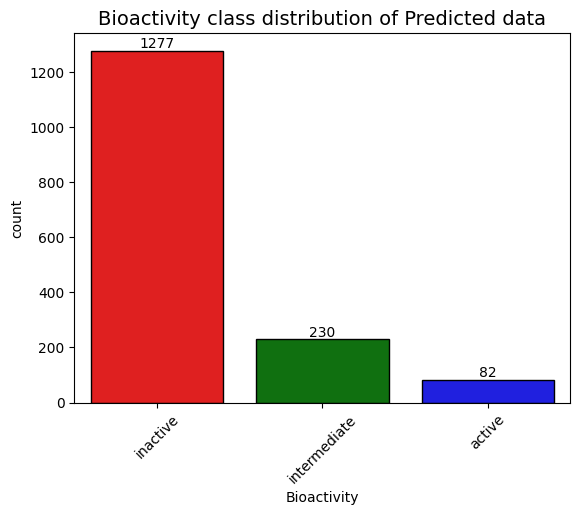

In [144]:
sns.countplot(x='Bioactivity', data=df_new, edgecolor='black',palette= color )
plt.title('Bioactivity class distribution of Predicted data', fontsize=14)
plt.xticks(rotation=45)
for i in range(3):
    plt.text(i, df_new.Bioactivity.value_counts()[i], df_new.Bioactivity.value_counts()[i], ha='center', va='bottom')


In [150]:
df_active = df_new[df_new.Bioactivity == 'active']
df_active.reset_index(drop=True, inplace=True)
df_active.to_csv('Pregnane_predicted_active.csv', index=False)

In [9]:
df_new = pd.read_csv('Pregnane_predictedlist.csv')
df_new


,compound_name,Canonical Smile,Predicted pIC50,standard_value,Bioactivity
0,"5alpha-Pregnane-3,20-dione",CC(=O)C1CCC2C1(CCC3C2CCC4C3(CCC(=O)C4)C)C,4.254514,55652.702615,inactive
1,"5beta-Pregnane-3,20-dione",CC(=O)C1CCC2C1(CCC3C2CCC4C3(CCC(=O)C4)C)C,4.254514,55652.702615,inactive
2,"Pregnane-3alpha,17alpha-diol-11,20-dione",CC(=O)C1(CCC2C1(CC(=O)C3C2CCC4C3(CCC(C4)O)C)C)O,4.266144,54182.086382,inactive
3,"Silane, [[(3alpha,5beta,20S)-pregnane-3,20-diy...",CC(C1CCC2C1(CCC3C2CCC4C3(CCC(C4)O[Si](C)(C)C)C...,4.457900,34841.787650,inactive
4,5beta-Pregnane,CCC1CCC2C1(CCC3C2CCC4C3(CCCC4)C)C,4.459183,34738.957706,inactive
...,...,...,...,...,...
1584,Lovastatin,CCC(C)C(=O)OC1CC(C=C2C1C(C(C=C2)C)CCC3CC(CC(=O...,8.106812,7.819671,active
1585,Pitavastatin,C1CC1C2=NC3=CC=CC=C3C(=C2C=CC(CC(CC(=O)O)O)O)C...,7.747887,17.869519,active
1586,Rosuvastatin,CC(C)C1=NC(=NC(=C1C=CC(CC(CC(=O)O)O)O)C2=CC=C(...,8.555385,2.783655,active
1587,Simvastatin,CCC(C)(C)C(=O)OC1CC(C=C2C1C(C(C=C2)C)CCC3CC(CC...,8.362397,4.341130,active


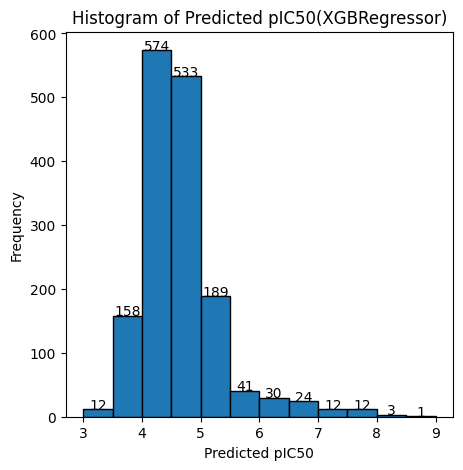

In [11]:
plt.figure(figsize=(5, 5))
bin = [3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9]
n, bins, _=plt.hist(df_new['Predicted pIC50'], bins=bin, edgecolor='black')
plt.xlabel('Predicted pIC50')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted pIC50(XGBRegressor)')
for i in  range(len(bin) - 1):
    plt.text((bin[i] + bin[i + 1]) / 2, n[i], 
             str(int(n[i])), ha='center')